In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/MyDrive/8.1/ml-100k/ml-100k" # 나중에 경로 수정하기

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("/content/gdrive/MyDrive/8.1/ml-100k/ml-100k/ua.base",
 sep="\t", names=['user', 'item', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/8.1/ml-100k/ml-100k/ua.test",
 sep="\t", names=['user', 'item', 'rating', 'timestamp'])

In [5]:
train

,user,item,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [6]:
items = torch.LongTensor(train['item'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['item'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [7]:
print(items.shape)
print(users.shape)
print(ratings.shape)

torch.Size([90570])
torch.Size([90570])
torch.Size([90570])


epoch: 0, cost: 24.104902
epoch: 100, cost: 0.562579
epoch: 200, cost: 0.494698
epoch: 300, cost: 0.471703
epoch: 400, cost: 0.461810
epoch: 500, cost: 0.455788
epoch: 600, cost: 0.451767
epoch: 700, cost: 0.448780
epoch: 800, cost: 0.446506
epoch: 900, cost: 0.444798
epoch: 1000, cost: 0.443473


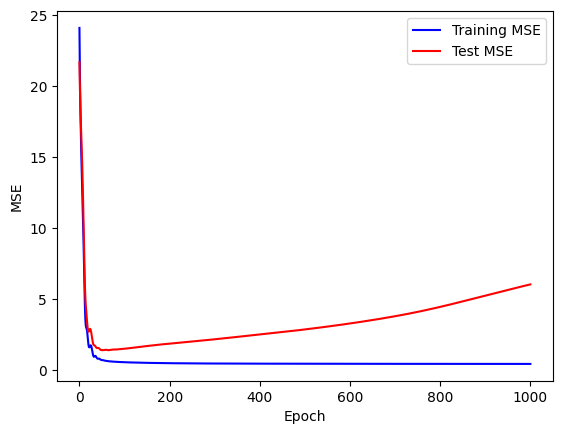

In [13]:
rank = 10 # 사용자가 지정하는 학습시키는 벡터의 크기
numItems = items.max() + 1 # 크기를 설정
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True) # 벡터 초기화
Q = torch.randn(numUsers, rank, requires_grad=True) # row, col순서를 안 바꿔도 후에 곱할때 순서만 맞춰주면 문제가 없음

optim = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1)
  cost = F.mse_loss(hypothesis ,ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()
  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())
  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 23.177351
epoch: 100, cost: 0.703956
epoch: 200, cost: 0.645179
epoch: 300, cost: 0.634641
epoch: 400, cost: 0.629993
epoch: 500, cost: 0.628036
epoch: 600, cost: 0.627181
epoch: 700, cost: 0.626841
epoch: 800, cost: 0.626673
epoch: 900, cost: 0.626554
epoch: 1000, cost: 0.626454


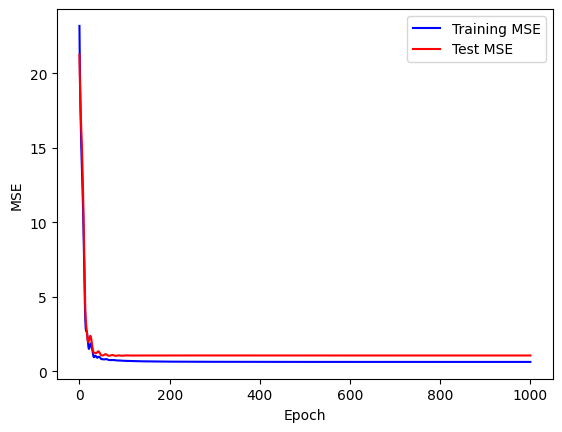

In [24]:
# 위에서 레귤라이저까지 추가해보기
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optim = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []
lambda1 = 0.0001
lambda2 = 0.0001

for epoch in range(1001):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1)
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)

  optim.zero_grad()
  loss.backward()
  optim.step()
  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())
  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 13.131363
epoch: 100, cost: 0.635314
epoch: 200, cost: 0.608324
epoch: 300, cost: 0.604790
epoch: 400, cost: 0.603842
epoch: 500, cost: 0.603305
epoch: 600, cost: 0.602921
epoch: 700, cost: 0.602657
epoch: 800, cost: 0.602428
epoch: 900, cost: 0.602209
epoch: 1000, cost: 0.602078


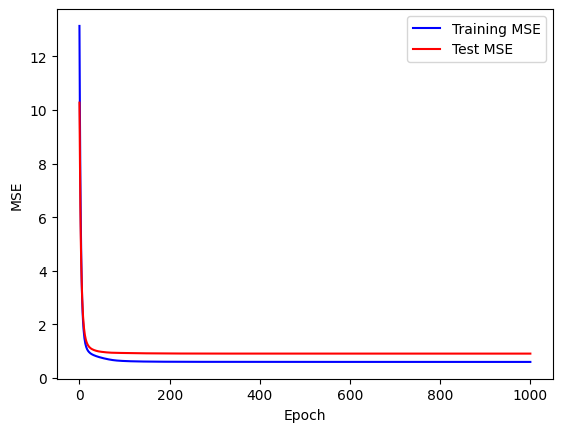

In [31]:
# bias 추가
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)

optim = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
mean = (ratings.sum() / len(ratings)).item()

for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optim.zero_grad()
  loss.backward()
  optim.step()
  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())
  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()